# Word Embedding/ Word Vectors

In [1]:
from keras.models import Sequential
from keras.layers import Embedding
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random
model = Sequential()
model.add(Embedding(1000, 2 ,input_length=1,))
#model.compile('adam','mse')

input_array = np.random.randint(1000,size=(32,1))
output_array = model.predict(input_array)

x_input_array = np.array([[5]])
y_input_array = np.array([[5]])

Using TensorFlow backend.


In [2]:
#input_array
#output_array
print model.predict(x_input_array)
print model.predict(y_input_array)

[[[ 0.03489813 -0.02883419]]]
[[[ 0.03489813 -0.02883419]]]


In [3]:
from keras.datasets import imdb

nb_features = 500
(trainX,trainY),(testX,testY) = imdb.load_data(nb_words=nb_features)
print trainX.shape,trainY.shape,testX.shape, testY.shape

(25000,) (25000,) (25000,) (25000,)


In [4]:
from keras.utils.data_utils import get_file
from keras.datasets import imdb
import pickle 
import numpy as np
path = get_file('imdb_full.pkl',
                origin='https://s3.amazonaws.com/text-datasets/imdb_full.pkl',
                md5_hash='d091312047c43cf9e4e38fef92437263')
f = open(path, 'rb')
(train_X, train_Y), (test_X, test_Y) = pickle.load(f)

In [5]:
wordidx = imdb.get_word_index()
idx2word = {i:w for w,i in wordidx.items()}

In [6]:
length_data = [len(s) for s in trainX + testX]
print min(length_data),max(length_data),np.mean(length_data)

69 2569 469.51784


In [7]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

sequence_length = 500

trainX_sequences = pad_sequences(trainX, maxlen=sequence_length,value=0)
testX_sequences = pad_sequences(testX,maxlen=sequence_length,value=0)
print trainX_sequences.shape,testX_sequences.shape

(25000, 500) (25000, 500)


In [8]:
from keras.utils import np_utils

trainY_onehot = np_utils.to_categorical(trainY)
testY_onehot = np_utils.to_categorical(testY)

# Simple Dense Model

In [77]:
from keras.models import Model
from keras.layers import Input,Embedding,Dense, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler


seq_input = Input(shape=(sequence_length,))

embedded_input = Embedding(nb_features,32,input_length=sequence_length)(seq_input)

flatten_vectors = Flatten()(embedded_input)

hidden_layer = Dense(100,activation='relu')(flatten_vectors)
output_layer = Dense(2,activation='softmax')(hidden_layer)

weight_checkpoint = ModelCheckpoint('best_validation_accuracy.h5',monitor='val_loss',mode='auto')

model = Model(input=seq_input, output = output_layer)

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 500)           0                                            
____________________________________________________________________________________________________
embedding_8 (Embedding)          (None, 500, 32)       160000      input_4[0][0]                    
____________________________________________________________________________________________________
flatten_3 (Flatten)              (None, 16000)         0           embedding_8[0][0]                
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 100)           1600100     flatten_3[0][0]                  
___________________________________________________________________________________________

In [78]:
model.fit(trainX_sequences,trainY_onehot,
          nb_epoch=5,batch_size=64,
          validation_data=(testX_sequences,testY_onehot),
          verbose=2, 
          callbacks=[weight_checkpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
2s - loss: 0.4135 - acc: 0.7926 - val_loss: 0.2922 - val_acc: 0.8770
Epoch 2/5
2s - loss: 0.1362 - acc: 0.9504 - val_loss: 0.3957 - val_acc: 0.8538
Epoch 3/5
2s - loss: 0.0277 - acc: 0.9918 - val_loss: 0.5089 - val_acc: 0.8553
Epoch 4/5
2s - loss: 0.0044 - acc: 0.9995 - val_loss: 0.6053 - val_acc: 0.8578
Epoch 5/5
2s - loss: 6.7327e-04 - acc: 1.0000 - val_loss: 0.6672 - val_acc: 0.8595


In [79]:
from sklearn.metrics import accuracy_score

accuracy_score(np.argmax(model.predict(testX_sequences),axis=1), testY)

0.85948000000000002

# Convolutional Neural Net

In [80]:
from keras.layers import Convolution1D, MaxPooling1D, Dropout, Conv1D

seq_input = Input(shape=(sequence_length,))

embedded_input = Embedding(nb_features,32,input_length=sequence_length,dropout=0.2)(seq_input)

conv1 = Conv1D(64,5,border_mode='same',activation='relu')(embedded_input)

dropout = Dropout(0.2)(conv1)

max_pooling1 = MaxPooling1D()(dropout)

flatten1 = Flatten()(max_pooling1)

dense1 = Dense(100,activation='relu')(flatten1)
dropout2 = Dropout(0.7)(dense1)
outcome = Dense(2,activation='softmax')(dropout2)

model = Model(input=seq_input, output=outcome)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 500)           0                                            
____________________________________________________________________________________________________
embedding_9 (Embedding)          (None, 500, 32)       160000      input_5[0][0]                    
____________________________________________________________________________________________________
convolution1d_2 (Convolution1D)  (None, 500, 64)       10304       embedding_9[0][0]                
____________________________________________________________________________________________________
dropout_3 (Dropout)              (None, 500, 64)       0           convolution1d_2[0][0]            
___________________________________________________________________________________________

In [81]:
model.fit(trainX_sequences,trainY_onehot,
          nb_epoch=5,batch_size=64,
          validation_data=(testX_sequences,testY_onehot),
          verbose=2, 
          callbacks=[weight_checkpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
6s - loss: 0.4882 - acc: 0.7303 - val_loss: 0.2665 - val_acc: 0.8902
Epoch 2/5
6s - loss: 0.2929 - acc: 0.8848 - val_loss: 0.2559 - val_acc: 0.8966
Epoch 3/5
6s - loss: 0.2523 - acc: 0.9014 - val_loss: 0.2571 - val_acc: 0.8940
Epoch 4/5
6s - loss: 0.2328 - acc: 0.9106 - val_loss: 0.2525 - val_acc: 0.8953
Epoch 5/5
6s - loss: 0.2155 - acc: 0.9151 - val_loss: 0.2662 - val_acc: 0.8882


In [82]:
emb_model = Model(input=seq_input,output=embedded_input)


In [83]:
emb_model.predict(trainX_sequences[:1])

array([[[ 0.02071318, -0.00644336,  0.03133474, ...,  0.00569983,
          0.01214417, -0.015577  ],
        [ 0.02071318, -0.00644336,  0.03133474, ...,  0.00569983,
          0.01214417, -0.015577  ],
        [ 0.02071318, -0.00644336,  0.03133474, ...,  0.00569983,
          0.01214417, -0.015577  ],
        ..., 
        [-0.01231275,  0.02613163,  0.0322069 , ...,  0.06544612,
          0.05012892, -0.00887723],
        [ 0.0458912 , -0.01760099,  0.01300736, ..., -0.06980281,
         -0.04653062, -0.01604181],
        [ 0.02704358, -0.03128574, -0.01936052, ..., -0.01234974,
         -0.04732128, -0.00144164]]], dtype=float32)

# Read The Glove Embeddings

In [64]:
#Read the 50d word embedding
fh = open('nlp_training/glove.6B/glove.6B.300d.txt','r')
data  = fh.readlines()
print np.array(data).shape
fh.close()

word_embeddings = {}
words = []
for line in data:
    list_of_things = line.strip().split()
    word_embeddings[str(list_of_things[0])] =  np.asarray(list_of_things[1:],dtype='float32')
    words.append(list_of_things[0])

(400000,)


In [65]:
np.linalg.norm(word_embeddings['king'] - word_embeddings['queen'] )

5.966258

In [66]:
np.linalg.norm((word_embeddings['man'] - word_embeddings['woman']))

4.7539396

In [67]:
np.linalg.norm((word_embeddings['husband'] - word_embeddings['wife']))

3.1520464

In [68]:
np.linalg.norm((word_embeddings['brother'] - word_embeddings['sister']))

5.4631982

In [118]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
word_list = ['king','husband','man','wife','woman','queen','he','she']#words[:100]
embedding_list = np.array([word_embeddings[wrd]for wrd in word_list])
random.seed(0)
tsne = PCA(n_components=3)
final_vectors = tsne.fit_transform(embedding_list)

viz_x = [float(x[0]) for x in final_vectors]
viz_y = [float(x[1]) for x in final_vectors]
viz_z = [float(x[2]) for x in final_vectors]

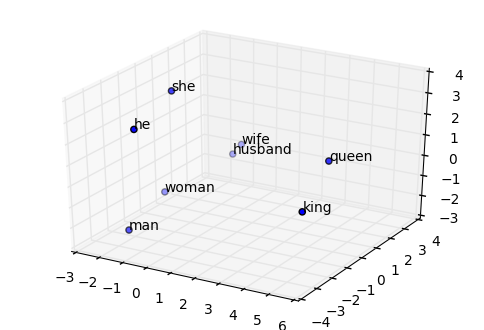

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
# ax.scatter3d
ax.scatter(viz_x, viz_y,viz_z)

for i, txt in enumerate(word_list):
    ax.text(viz_x[i], viz_y[i],viz_z[i],  '%s' % (str(word_list[i])), size=10, zorder=1,  
     color='k')

In [91]:
wordidx = imdb.get_word_index()
idx2word = {i:w for w,i in wordidx.items()}

In [92]:
np.min(np.array(wordidx.values()))

1

In [93]:
EMBEDDING_DIMENSIONS = 50
nb_features = 5000

embedding_matrix = np.zeros((nb_features+1,EMBEDDING_DIMENSIONS))

for i in range(1,nb_features+1):
    selected_word = idx2word[i]
    #if selected_word in word_embeddings.keys():
    embedding_matrix[i] = word_embeddings.get(selected_word
    else:
        #print selected_word, "Not Present"
        embedding_matrix[i] = np.random.normal(loc = 0.0, scale=0.6, size=(EMBEDDING_DIMENSIONS,))
        

In [104]:
from keras.layers import Convolution1D,MaxPooling1D, Dropout,Conv1D
from keras.callbacks import ModelCheckpoint

seq_input = Input(shape=(sequence_length,),dtype='int32')

embedded_input = Embedding((nb_features+1),EMBEDDING_DIMENSIONS,
                           weights=[embedding_matrix],
                           input_length=sequence_length,
                           trainable=False)(seq_input)

conv1 = Conv1D(64,5,border_mode='same',activation='relu')(embedded_input)
dropout1 = Dropout(0.2)(conv1)
max_pooling1 = MaxPooling1D()(dropout1)
flatten1 = Flatten()(max_pooling1)
dense1 = Dense(100,activation='relu')(flatten1)
dropout2 = Dropout(0.7)(dense1)
outcome = Dense(2,activation='softmax')(dropout2)

model = Model(input=seq_input, output=outcome)
#weight_checkpoint = ModelCheckpoint('best_validation_loss.h5',monitor='val_acc',mode='max')
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [105]:
model.fit(trainX_sequences,trainY_onehot,nb_epoch=5,batch_size=64,
          validation_data = (testX_sequences,testY_onehot),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
5s - loss: 0.6815 - acc: 0.5261 - val_loss: 0.6668 - val_acc: 0.5430
Epoch 2/5
5s - loss: 0.6425 - acc: 0.6054 - val_loss: 0.6264 - val_acc: 0.6228
Epoch 3/5
5s - loss: 0.6034 - acc: 0.6579 - val_loss: 0.6111 - val_acc: 0.6395
Epoch 4/5
5s - loss: 0.5551 - acc: 0.7015 - val_loss: 0.5965 - val_acc: 0.6630
Epoch 5/5
5s - loss: 0.5075 - acc: 0.7408 - val_loss: 0.5892 - val_acc: 0.6790


In [106]:
model.layers[1].trainable = True

In [107]:
model.fit(trainX_sequences,trainY_onehot,nb_epoch=1,batch_size=64,
          validation_data = (testX_sequences,testY_onehot),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/1
5s - loss: 0.4582 - acc: 0.7724 - val_loss: 0.6010 - val_acc: 0.6771


In [108]:
model.fit(trainX_sequences,trainY_onehot,nb_epoch=1,batch_size=64,
          validation_data = (testX_sequences,testY_onehot),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/1
5s - loss: 0.4104 - acc: 0.8035 - val_loss: 0.6159 - val_acc: 0.6753


In [109]:
model.optimizer.lr=1e-4

In [110]:
model.fit(trainX_sequences,trainY_onehot,nb_epoch=1,batch_size=64,
          validation_data = (testX_sequences,testY_onehot),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/1
5s - loss: 0.3708 - acc: 0.8261 - val_loss: 0.6391 - val_acc: 0.6804


In [112]:
model.fit(trainX_sequences,trainY_onehot,nb_epoch=5,batch_size=64,
          validation_data = (testX_sequences,testY_onehot),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
5s - loss: 0.3096 - acc: 0.8617 - val_loss: 0.7175 - val_acc: 0.6706
Epoch 2/5
5s - loss: 0.2832 - acc: 0.8742 - val_loss: 0.7615 - val_acc: 0.6761
Epoch 3/5
5s - loss: 0.2613 - acc: 0.8865 - val_loss: 0.7393 - val_acc: 0.6812
Epoch 4/5
5s - loss: 0.2457 - acc: 0.8946 - val_loss: 0.8430 - val_acc: 0.6774
Epoch 5/5
5s - loss: 0.2267 - acc: 0.9042 - val_loss: 0.8391 - val_acc: 0.6791
